Data Description: The actual concrete compressive strength (MPa) for a given mixture under aspecific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1
quantitative output variable, and 1030 instances (observations).

Domain:Cement manufacturing

Context:Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

Attribute Information:

Cement : measured in kg in a m3 mixture
Blast  : measured in kg in a m3 mixture
Fly ash : measured in kg in a m3 mixture
Water : measured in kg in a m3 mixture
Superplasticizer : measured in kg in a m3 mixture
Coarse Aggregate : measured in kg in a m3 mixture
Fine Aggregate : measured in kg in a m3 mixture
Age : day (1~365)
Concrete compressive strength measured in MPa

Learning Outcomes:

Exploratory Data Analysis
Building ML models for regression
Hyper parameter tuning

Objective:

Modeling of strength of high performance concrete using Machine Learning.

### Deliverable -1 (Exploratory data quality report reflecting the following)

#### a. Univariate analysis
    i) Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [1]:
#Load all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load data from dataset
concrete_data=pd.read_csv('concrete.csv')
concrete_data.shape

(1030, 9)

This dataset has 1030 rows and 9 columns. Let us take a look at how the data looks.

In [3]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#Datatypes of the variables
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


###### From the above table we can see that all the ingredients are of float datatype and age is of integer datatype. The target variable "strength" is also of float datatype. Let us see the type of each variable.

1. cement- numerical continuous variable since it needs to be measured
2. slag-numerical continuous variable since it needs to be measured
3. ash-numerical continuous variable since it needs to be measured
4. water-numerical continuous variable since it needs to be measured
5. superplastic-numerical continuous variable since it needs to be measured
6. coarseagg-numerical continuous variable since it needs to be measured
7. fineagg-numerical continuous variable since it needs to be measured
8. age- numerical discrete variable as it can be counted
9. strength-numerical continuous variable since it needs to be measured

###### Independent variables: age and different ingredients like cement, slag, ash, water, superplastic, coarseagg, fineagg

###### Target variable: strength

###### Let us find the range of values of each column from the above table

In [5]:
print(concrete_data.max()-concrete_data.min())

cement          438.00
slag            359.40
ash             200.10
water           125.20
superplastic     32.20
coarseagg       344.00
fineagg         398.60
age             364.00
strength         80.27
dtype: float64


###### Let us now see more details about the dataset

In [6]:
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


###### Calculating the skewness of the columns of dataset

In [7]:
concrete_data.skew(axis = 0, skipna = True)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

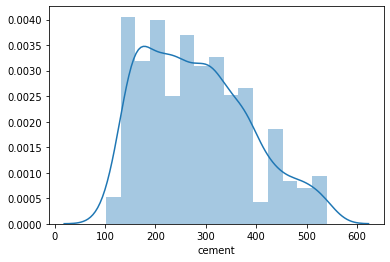

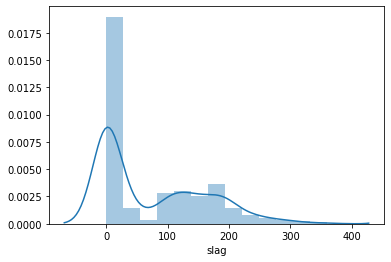

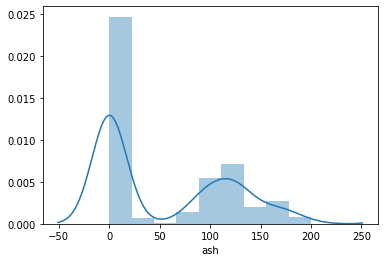

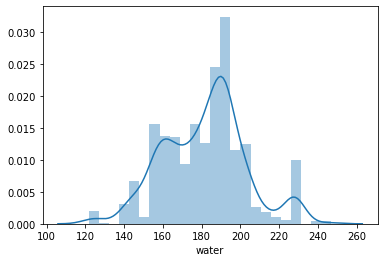

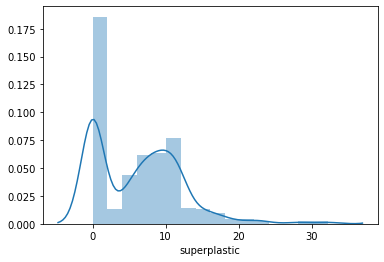

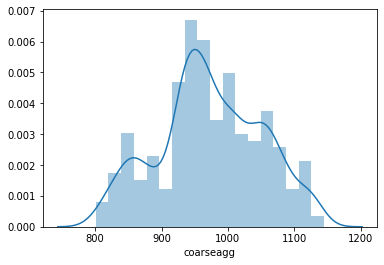

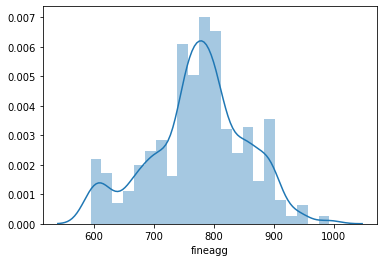

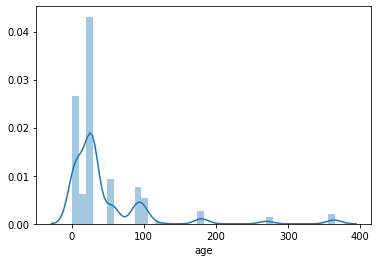

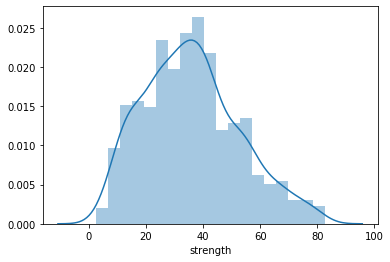

In [8]:
for column in concrete_data.columns:
    plt.figure()            
    sns.distplot(concrete_data[column])

###### Let us also check for outliers in each column

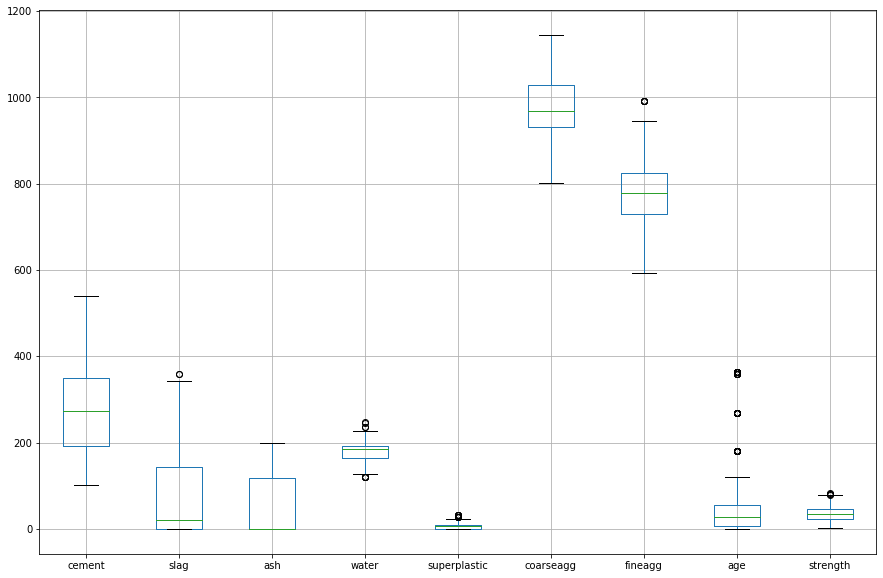

In [9]:
boxplot = concrete_data.boxplot(column=['cement', 
                                           'slag', 
                                           'ash',
                                           'water',
                                           'superplastic',
                                           'coarseagg',
                                          'fineagg',
                                          'age',
                                           'strength'
                                          ],figsize=(15,10))

###### Inference of each column from the above charts and calculations:

###### 1. Cement

1. The average amount of cement used is 281.16kgs and the median amount is 272.9kgs, which means the data is skewed a little bit towards the right(mean>median). 
2. The range of the cement column is 438kgs.
3. From the histograms we saw that the exact amount of skewness is 0.50, which means it is very slightly rightly skewed.
4. From the outlier graph we can also see that there are no outliers for the cement column.

###### 2. Slag

1. The average amount of slag used is 73.89kgs and the median amount is 22kgs, which means the data is skewed clearly towards the right(mean>median). 
2. The range of the slag column is 359.4 kgs, which is not very meaningful in this case because it is equal to the max value.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is 0.80, which means it is very rightly skewed.
4. There are 2 gaussians in slag column.
5. From the outlier graph we can also see that there are  outliers for the slag column.

###### 3. Ash

1. The average amount of ash used is 54 kgs and the median amount is 0kgs, which means the data is skewed clearly towards the right(mean>median).
2. Since the median is 0, this means that most of the values are 0 for the ash column.
3. The range of the ash column is 200 kgs.
4. From the histograms and skewness calculations we saw that the exact amount of skewness is 0.53, which means it is rightly skewed.
5. There are 2 gaussians in ash column.
6. From the outlier graph we can also see that there are no outliers for the ash column.

###### 4. Water

1. The average amount of water used is 181kgs and the median amount is 185kgs, which means the data is very slightly negatively skewed(mean<media).However the difference is minimal hence it can be considered as a normal distribution. 
2. The range of the water column is 125kgs.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is 0.07, which means it follows almost a very normal distribution.
4. There are 3 gaussians in the water column.
5. From the outlier graph we can also see that there are outliers for the water column.

###### 5. Superplastic

1. The average amount of superplastic used is 6.2kgs and the median amount is 6.4kgs, which means the data is very slightly negatively skewed(mean<media).However the difference is minimal hence it can be considered as a normal distribution. 
2. The range of the superplastic column is 125kgs.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is 0.90, which means the data is positively skewed.
4. There are 2 gaussians in the superplastic column.
5. From the outlier graph we can also see that there are outliers for the superplastic column.

###### 6.Coarseagg 

1. The average amount of coarseagg  used is 972kgs and the median amount is 968 kgs, which means the data is very slightly positively skewed(mean>media).However the difference is minimal hence it can be considered as a normal distribution. 
2. The range of the coarseagg  column is 344kgs.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is -0.04, which means it follows almost a very normal distribution.
4. There are 3 gaussians in the coarseagg column.
5. From the outlier graph we can also see that there are no outliers for the coarseagg  column.

###### 7.Fineagg

1. The average amount of fineagg used is 773kgs and the median amount is 779kgs, which means the data is very slightly negatively skewed(mean<median).However the difference is minimal hence it can be considered as a normal distribution. 
2. The range of the fineagg column is 398 kgs.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is -0.25, which means it follows almost a very normal distribution.
4. There are 2 gaussians in the fineagg column.
5. From the outlier graph we can also see that there are outliers for the fineagg column.

###### 8.Age

1. The average age of the concrete used is 45 days and the median amount is 28 days, which means the data is heavily skewed towards the right(mean>median).
2. The range of the age column is 365 days which clearly means this data has outliers.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is 3.26, which means it follows almost a very positively skewed distribution.
4. There are almost 5 gaussians in the age column.
5. From the outlier graph we can also see that there are quite a few outliers for the age column.

###### 9. Strength

1. The average amount of strength used is 35.8MPa and the median amount is 34.4MPa, which means the data is very slightly positively skewed(mean>media).However the difference is minimal hence it can be considered as a normal distribution. 
2. The range of the strength column is 80.27MPa.
3. From the histograms and skewness calculations we saw that the exact amount of skewness is 0.07, which means it follows almost a very normal distribution.
4. From the outlier graph we can also see that there are quite a few outliers for the strength column.
5. This is the target column of our dataset.

#### b. Multivariate analysis
Bi-variate analysis between the predictor variables and between the predictor variables and target column.
Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points.
Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

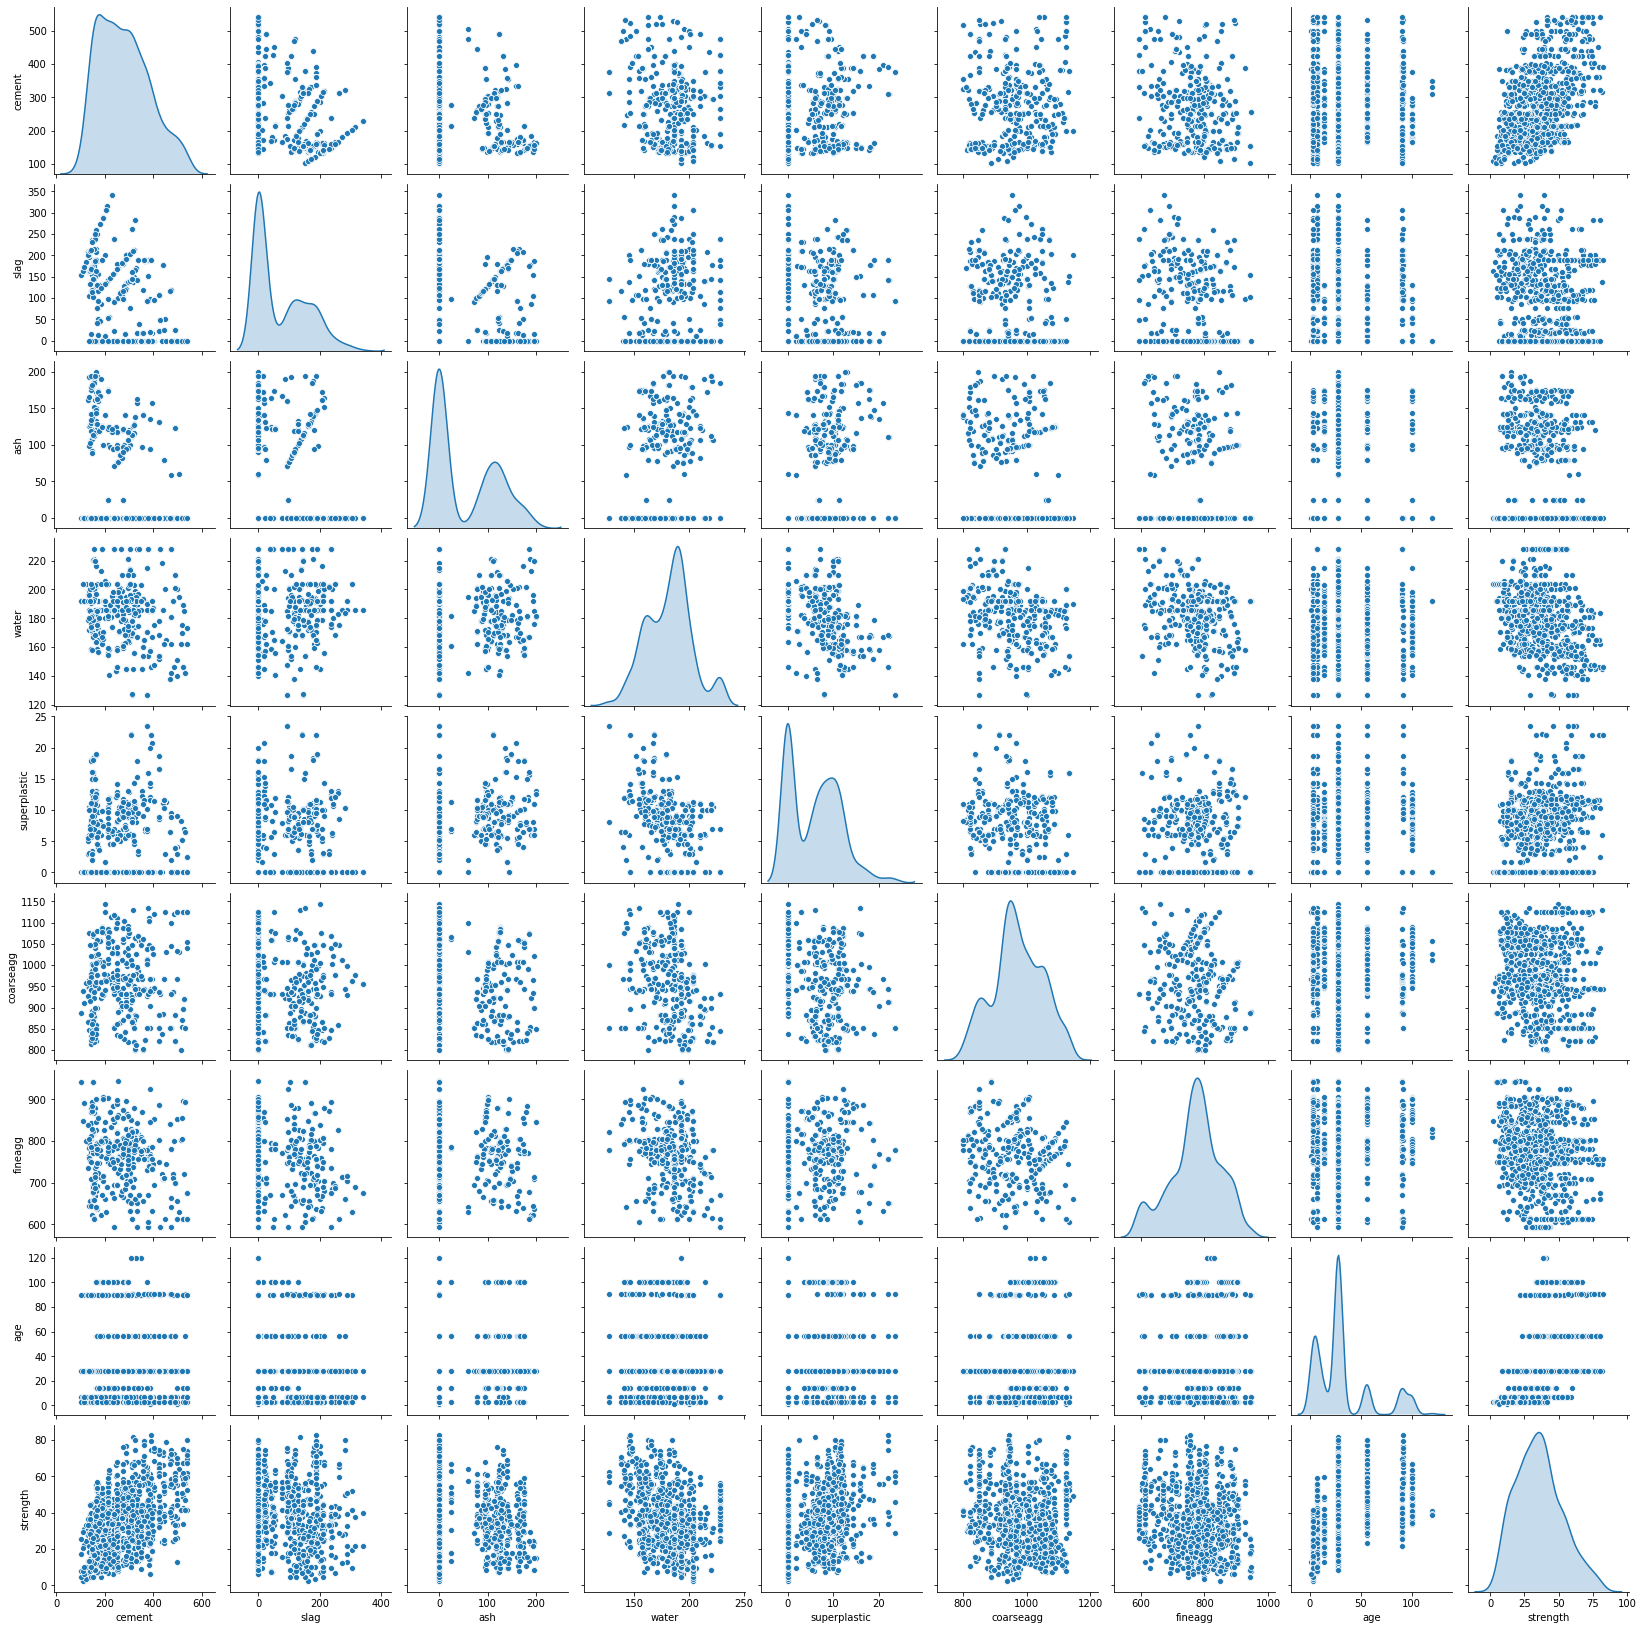

In [17]:
concrete_data_new = concrete_data[(concrete_data.T!=0).any()]
sns.pairplot(concrete_data_new,diag_kind='kde')
plt.show()

##### From the pairplot we can see a visual representation of correlation of all the features. 

1. There are at least 3 to 12(3*4) gaussians(clusters) present in the dataset we can see from the density plots.
2. Slag, superplastic, coarsearg, finearg have a negative relationship with water.
3. Cement has a very strong relationship with strength.
4. As age increases strength of concrete increases.
5. There is no clear linear relationship between the independent attributes as we can see from the pairplot.

###### Let us understand the correlation of the dataset a bit more using heatmaps

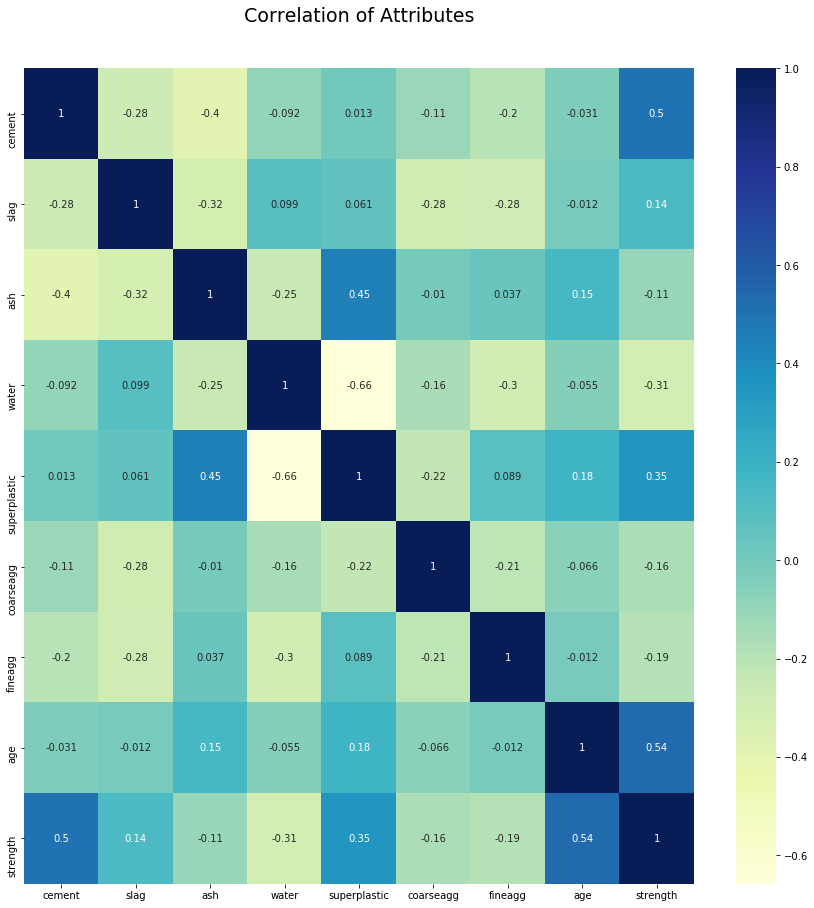

In [23]:
#drawing a heatmap to check the correlation between columns
plt.figure(figsize = (15,15))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(concrete_data.corr(),cmap="YlGnBu",annot=True)

1. There is a linear relationship between compressive strength of concrete and cement, which means as amount of cement increases, compressive strength increases.
2. Strong correlation between age and compressive strength of concrete and cement and compressive strength of concrete.
3. Compressive strength of concrete increases as the amount of superplastic increases to a certain extent.
4. The amount of water has a very strong negative correlation with superplastic, which means more superplastic less the amount of water to be given.
5. Water should also be reduced with the increase in amount of fineagg as they also have a strong negative correlation with each other, but not as much as superplastic.
6. Compressive strength of concrete reduces as the amount of water increases, as they both have a negative correlation with each other.
7. There is a minimal correlation between age and the other ingredients.
8. There is a negative correlation between ash and cement, which means more the cement, less the ash should be mixed.
9. The amount of superplastic increases as the quantity of ash increases as they have a positive correlation.

###### From the above analysis if we were to pick the most important variables which affect the compressive strength of concrete, they would be cement,age,water,superplastic,fineagg and ash in that order.

#### c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation

###### We will now check if there are any null values in the dataset

In [24]:
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

We can see that there are no null or missing values in the dataset.

##### We had seen from the boxplots that there are outliers present in the slag, water, superplastic, fineagg, age and strength. Let us replace them with median values

In [25]:
def quartile_data(datacolumn):
 Q1 = concrete_data[datacolumn].quantile(0.25)
 Q3 = concrete_data[datacolumn].quantile(0.75)
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [26]:
for datacolumn in concrete_data.columns[:-1]:
    lowerbound,upperbound = quartile_data(datacolumn)
    concrete_data.loc[(concrete_data[datacolumn] < lowerbound) | (concrete_data[datacolumn] > upperbound),datacolumn] = concrete_data[datacolumn].median()

Let us plot the boxplots and check if there are any more outliers

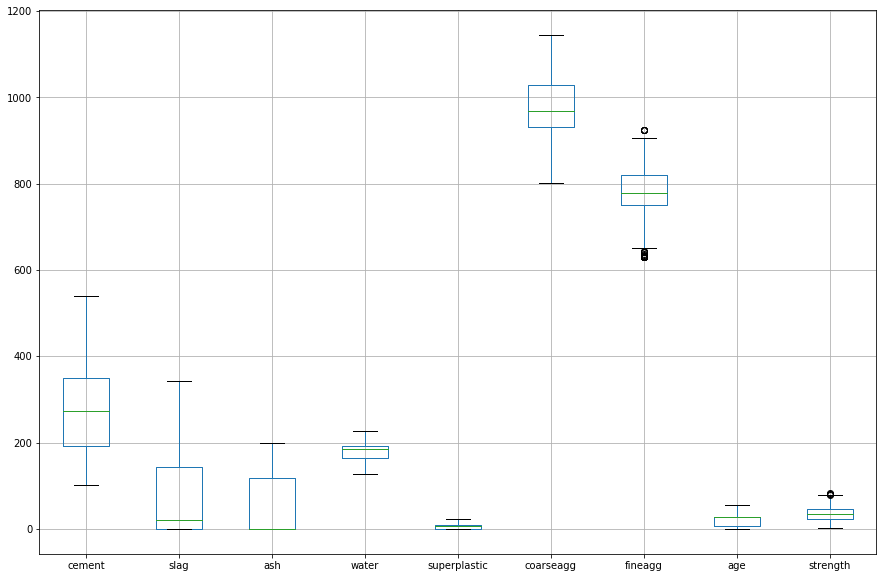

In [27]:
boxplot = concrete_data.boxplot(column=['cement', 
                                           'slag', 
                                           'ash',
                                           'water',
                                           'superplastic',
                                           'coarseagg',
                                          'fineagg',
                                          'age',
                                           'strength'
                                          ],figsize=(15,10))

We can see that there are still some outliers in the data for fineagg, age and strength which we will ignore as of now. While creating models we will scale the data.

### 2. Deliverable -2 (Feature Engineering techniques)

##### a. Identify opportunities (if any) to create a composite feature, drop a feature etc.

Let us take a closer look at the correlation co-efficients of each column with that of strength.

In [28]:
concrete_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275046,-0.397467,-0.091614,0.013336,-0.109349,-0.049114,-0.031151,0.497832
slag,-0.275046,1.000000,-0.320468,0.098880,0.061195,-0.283882,-0.330481,-0.012265,0.137800
ash,-0.397467,-0.320468,1.000000,-0.248011,0.447492,-0.009961,0.014242,0.154224,-0.105755
water,-0.091614,0.098880,-0.248011,1.000000,-0.658056,-0.156928,-0.343082,-0.054536,-0.307711
superplastic,0.013336,0.061195,0.447492,-0.658056,1.000000,-0.224503,0.104294,0.178058,0.346260
coarseagg,-0.109349,-0.283882,-0.009961,-0.156928,-0.224503,1.000000,-0.064571,-0.065762,-0.164935
fineagg,-0.049114,-0.330481,0.014242,-0.343082,0.104294,-0.064571,1.000000,-0.013094,-0.108724
age,-0.031151,-0.012265,0.154224,-0.054536,0.178058,-0.065762,-0.013094,1.000000,0.537951
strength,0.497832,0.137800,-0.105755,-0.307711,0.346260,-0.164935,-0.108724,0.537951,1.000000


1. From the above table, we can see that compressive strength of concrete has the least correlation of any form with slag and ash. Therefore, they can be removed from the dataset. 
2. None of the attributes have a very strong correlation with each other, hence composite variables would not make much difference.

#### b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

###### We can clearly see from the pairplots and heatmaps that there does not exist any clear linear relationship between independent variables, hence a linear model would not be correct to use. We would need quadratic models, but let us check our observations now.Let us check the complexity of the model using Linear, Ridge and Lasso regressions

In [65]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [66]:
X = concrete_data.drop('strength', axis=1)
y = concrete_data[['strength']]
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

###### 1. Linear model

In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6387484144486607
The coefficient for slag is 0.3458295385887974
The coefficient for ash is 0.10860098799965444
The coefficient for water is -0.20019842271871408
The coefficient for superplastic is 0.04220207605776396
The coefficient for coarseagg is 0.018243281238159402
The coefficient for fineagg is -0.004236781292790743
The coefficient for age is 0.5185917586749048


In [73]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.008613078730287483


###### 2. Ridge model

In [74]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.63769991  0.34476884  0.10758047 -0.20033454  0.04261191  0.01782826
  -0.00473653  0.5183573 ]]


###### 3. Lasso Model

In [75]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.44371097  0.14939293 -0.         -0.11523128  0.06329867 -0.
 -0.          0.42972461]


###### Comparision of scores- Linear, ridge, lasso

In [78]:
#print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
#print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
#print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7129414819133485
0.7128398881252653
0.6244326526442545


###### We can see that the scores are more or less similar, with lasso being the least for linear models.

###### Since we saw many non linear relationships within the independent attributes let us try quadratic models

In [105]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

###### We can see that after using a quadratic approach, the number of columns have increased from 9 to 37. Let us try the above models on quadratic models

###### 1. Linear model

In [106]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[-1.18761568e-16  1.13329209e+01  7.37605643e+00  2.96472969e+00
 -3.45888912e+00 -1.26806724e-01 -7.67282074e-03  2.47235805e-01
  8.83345348e+00  1.13997414e+00  1.72932388e+00 -2.80025629e+00
 -2.27565704e+00  8.51352324e-01  6.88725773e-01  1.80324705e-01
  1.88552426e+00 -2.08775315e+00 -1.64108400e+00  2.81289226e-01
  1.06299371e+00  1.07077963e+00 -3.27796368e+00 -3.17912570e+00
  1.64243394e+00  1.99694247e+00 -4.69468267e-01 -2.55054876e-01
 -2.63991246e+00 -1.34656068e+00 -1.53977031e+00 -1.25946050e+00
 -1.37984269e+00 -2.11637858e+00  8.78810860e-01  2.52851867e-01
 -1.10081886e+00]


###### 2. Ridge model

In [107]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.         11.29913228  7.32997102  2.92040811 -3.46963048 -0.11600121
  -0.02507212  0.22936574  8.83066347  1.12527044  1.70325179 -2.77255743
  -2.25013446  0.85160216  0.68566322  0.17847876  1.85650421 -2.05818481
  -1.61458484  0.28178912  1.0612565   1.06881358 -3.25777724 -3.16313868
   1.62892138  1.98346802 -0.47176872 -0.24998632 -2.62591223 -1.34098589
  -1.53776466 -1.24315084 -1.36491555 -2.11547791  0.88314251  0.25184415
  -1.10041843]]


###### 3. Lasso model

In [108]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         11.19594079  7.12798862  2.71724767 -3.44872973 -0.
 -0.04281156  0.1753255   8.8546231   0.97678024  1.49920903 -2.59064095
 -1.96904405  0.79456098  0.60932666  0.09287226  1.65269785 -1.86324153
 -1.34313577  0.22980752  1.01360215  0.98822329 -3.11803248 -2.93151254
  1.51302413  1.87577223 -0.54589168 -0.16538918 -2.49987454 -1.28232883
 -1.51167693 -1.04348426 -1.1900537  -2.06125883  0.88111245  0.19399144
 -1.13880763]


###### Comparision of scores

In [109]:
#print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
#print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
#print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7754464096333723
0.7753502786712688
0.7756221027372929


#### We can see that the score has increased a bit more using quadratic polynomial degree 2 model, thus quadratic model is best suited for this dataset.

#### c. Explore for gaussians

###### 2. Let us explore the data for hidden clusters using K-Means clustering

In [112]:
#Let us again split the dataset and work with fresh set of data
X = concrete_data.drop('strength', axis=1)
y = concrete_data[['strength']]
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [176]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 7 )   # expect 3 to 9 clusters from the pair panel visual inspection hence restricting from 2 to 9
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,2.506199e+07
1,3,1.872265e+07
2,4,1.658030e+07
3,5,1.487712e+07
4,6,1.303998e+07


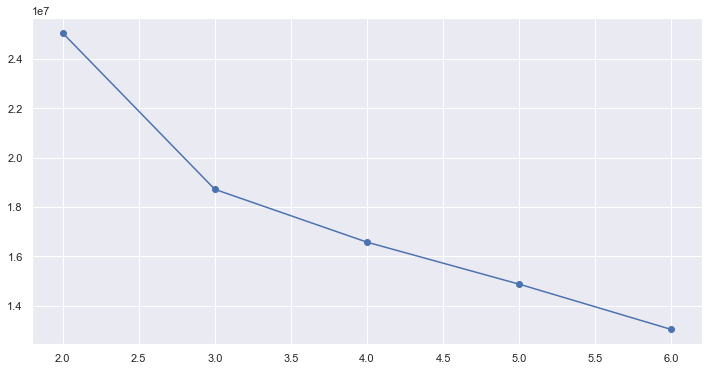

In [177]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###### From the elbow plot we can clearly see that there are 3-5 good clusters in the dataset

###### We will now try using 3 clusters

In [178]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

concrete_data_z = concrete_data.apply(zscore)

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(concrete_data_z)

prediction=cluster.predict(concrete_data_z)
concrete_data_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

concrete_data_z_copy = concrete_data_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [179]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.06115323,  0.10654158, -0.81896628,  0.71759098, -0.95766612,
         0.24289002, -0.16469024, -0.27864209, -0.39827654],
       [-0.62521379, -0.38598005,  1.11230461, -0.24613695,  0.48284373,
         0.08259231,  0.14960681,  0.17320273, -0.23948659],
       [ 0.97091017,  0.47252206, -0.41745686, -0.89691931,  0.92943283,
        -0.59115715,  0.04444352,  0.2137218 ,  1.14970904]])

In [180]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_data) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.061153,0.106542,-0.818966,0.717591,-0.957666,0.242890,-0.164690,-0.278642,-0.398277
1,-0.625214,-0.385980,1.112305,-0.246137,0.482844,0.082592,0.149607,0.173203,-0.239487
2,0.970910,0.472522,-0.417457,-0.896919,0.929433,-0.591157,0.044444,0.213722,1.149709


###### Let us do a visual analysis of the centroids using box plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F67F37648>,
      dtype=object)

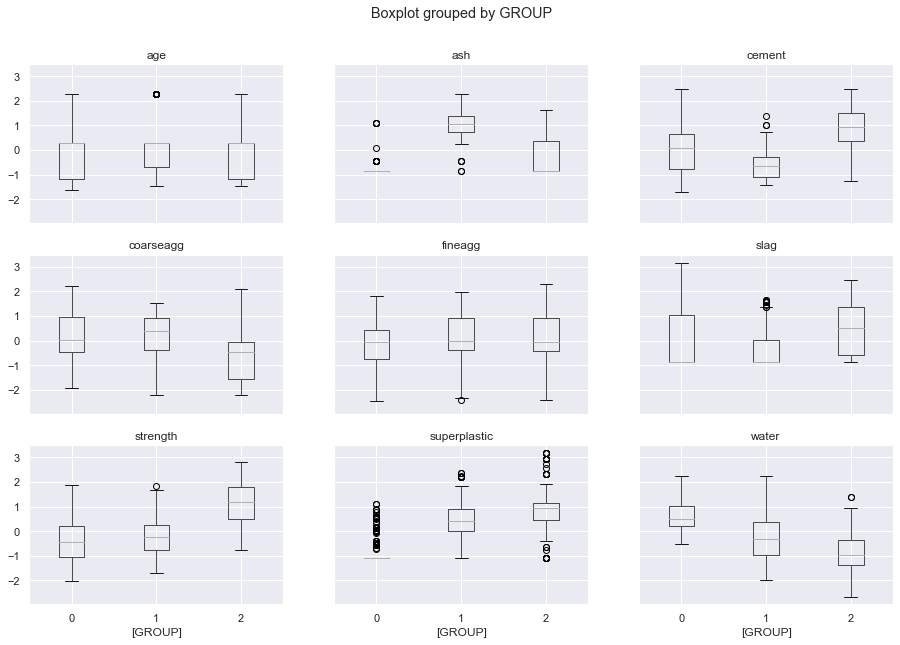

In [181]:
import matplotlib.pylab as plt

concrete_data_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

###### Let us address these outliers now

In [182]:
data = concrete_data_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 3*std # Subtract median from every member of each group. Take absolute values > 3std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(concrete_data_z['GROUP']))

C:\Users\Soumita\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


There are many outliers in most of the columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F6892D708>,
      dtype=object)

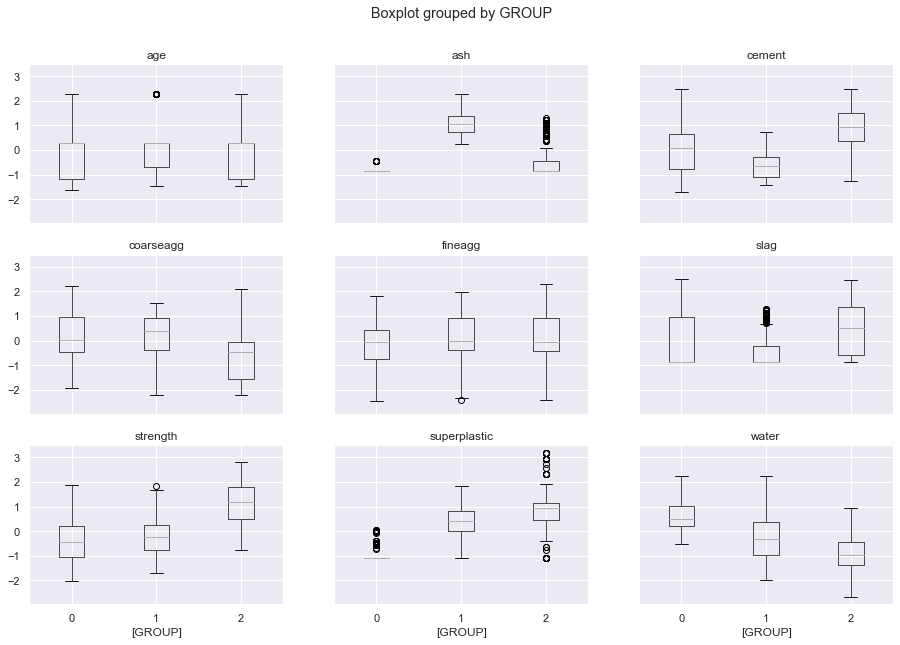

In [183]:
concat_data.boxplot(by = 'GROUP', layout=(3,3), figsize=(15, 10))

###### When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.

###### Let us now analyze the impact of independent variables on the strength of concrete

###### 1. Cement

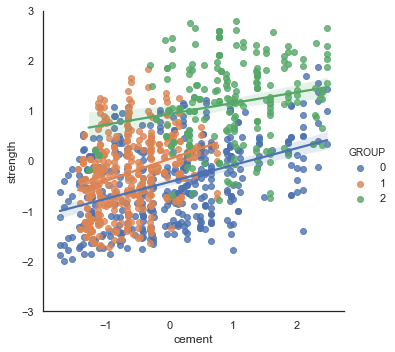

In [184]:
with sns.axes_style("white"):
    plot = sns.lmplot('cement','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Cement is a good predictor of strength

###### 2. Slag

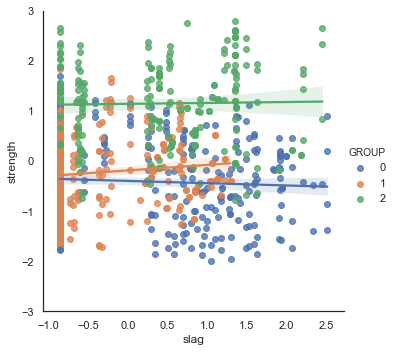

In [185]:
with sns.axes_style("white"):
    plot = sns.lmplot('slag','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Since the lines are vertical in the graph, slag is not at all a good predictor.

###### 3. Ash

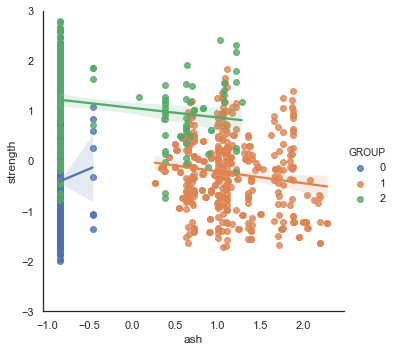

In [187]:
with sns.axes_style("white"):
    plot = sns.lmplot('ash','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Ash is a good predictor only for the first cluster, as the values increase it is not a good predictor

###### 4. Water

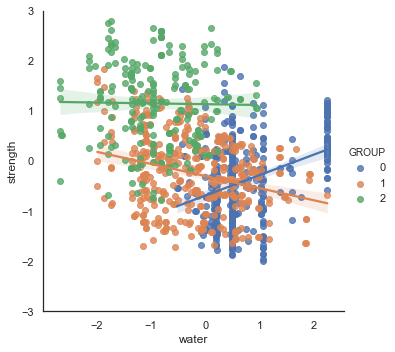

In [188]:
with sns.axes_style("white"):
    plot = sns.lmplot('water','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Water is not a very good predictor

###### 5. superplastic

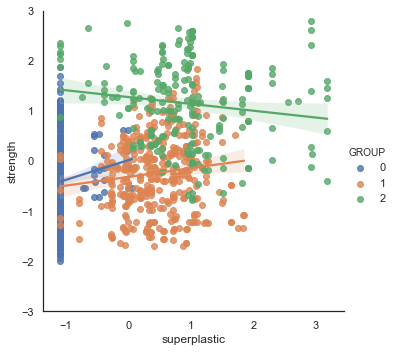

In [189]:
with sns.axes_style("white"):
    plot = sns.lmplot('superplastic','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Superplastic is not a good predictor

###### 6. coarseagg


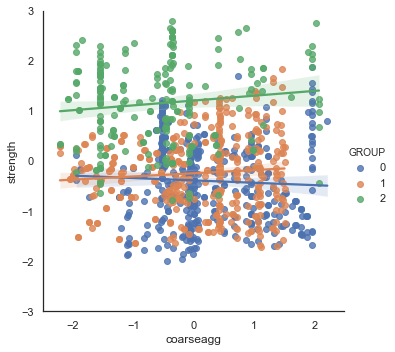

In [190]:
with sns.axes_style("white"):
    plot = sns.lmplot('coarseagg','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Coarseargg is not a good predictor because the graph is a straight line

###### 7. fineagg

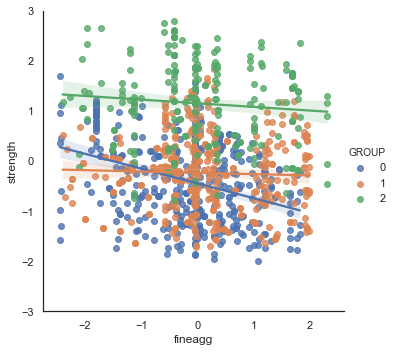

In [191]:
with sns.axes_style("white"):
    plot = sns.lmplot('fineagg','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### Fineagg is also not a good predictor of strength

###### 8. age

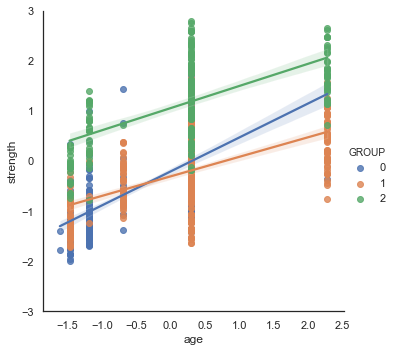

In [192]:
with sns.axes_style("white"):
    plot = sns.lmplot('age','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

###### We can see that age is a  good predictor of strength of concrete since the line is elevated, but k means does not provide a good result.

### 3. Deliverable -3 (create the model )

###### We will use the normal and scaled PCA dataset to the Decision Tree classifier.

###### 1. Decision Tree

In [246]:
#We will work with a fresh train and test set
from scipy.stats import zscore

concrete_data_attr_z = concrete_data.apply(zscore)

#We are splitting the data into 70% and 30% respectively for training and test.
from sklearn.model_selection import train_test_split
X = concrete_data_attr_z.drop(['strength'], axis = 1)
y = concrete_data_attr_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [247]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred_dtr = dtr.predict(X_test) 

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


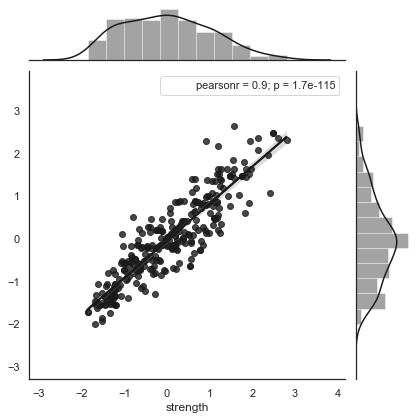

In [248]:
import scipy.stats as stat
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_dtr, kind="reg", color="k",stat_func=stat.pearsonr);

###### We can see that the Decision Tree gives a score of 90% which is good.

###### 2. Support Vector Regressor

In [321]:
#We will work with a fresh train and test set
from scipy.stats import zscore

concrete_data_attr_z = concrete_data.apply(zscore)

#We are splitting the data into 70% and 30% respectively for training and test.
from sklearn.model_selection import train_test_split
X = concrete_data_attr_z.drop(['strength'], axis = 1)
y = concrete_data_attr_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [322]:
from sklearn import svm
clr = svm.SVR()  

clr.fit(X_train , y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [323]:
y_pred = clr.predict(X_test)

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


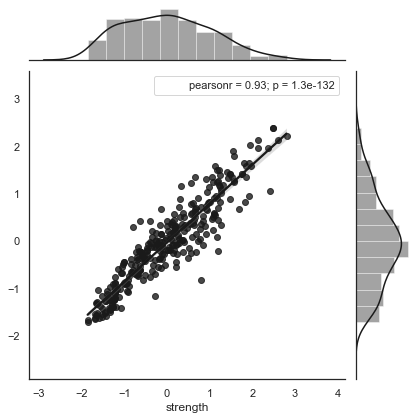

In [324]:
import scipy.stats as stat
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k",stat_func=stat.pearsonr);

###### We can see that the SVM gives a score of 93% which is very good.

###### 3. Random Forest

In [256]:
#We will work with a fresh train and test set
from scipy.stats import zscore

concrete_data_attr_z = concrete_data.apply(zscore)

#We are splitting the data into 70% and 30% respectively for training and test.
from sklearn.model_selection import train_test_split
X = concrete_data_attr_z.drop(['strength'], axis = 1)
y = concrete_data_attr_z['strength']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [257]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 
y_pred_rfr = rfr.predict(X_test) 

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


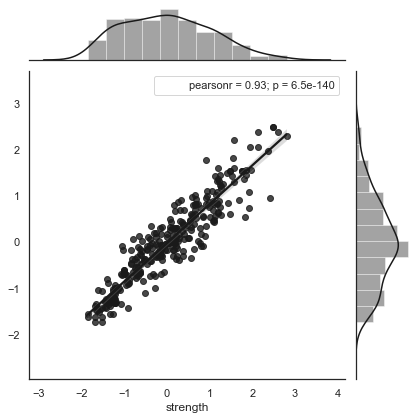

In [258]:
import scipy.stats as stat
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_rfr, kind="reg", color="k",stat_func=stat.pearsonr);

###### Random forest also gives a score of 93% which is quite good

### 4.  Deliverable -4 (Tuning the model)

###### From the above models we can see that SVM and Random forest are the best models which can be used.

#### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

###### We can see that with the above hyperparameters the model should perform better. Let us try using these values in the model.


In [331]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [332]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

###### Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [338]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train) 


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [339]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [342]:
y_pred_rfr_1 = rf_random.predict(X_test) 

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


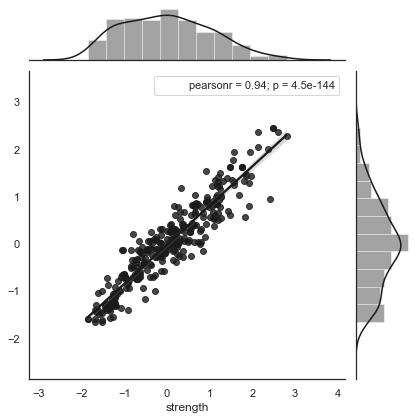

In [343]:
import scipy.stats as stat
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred_rfr_1, kind="reg", color="k",stat_func=stat.pearsonr);

###### We see that using the best parameters we were able to gain an accuracy of 94% which is the best among the lot

##### c. Model performance range at 95% confidence level

##### Let us use PCA to reduce the dimensions of the model and check model performance at 95% confidence intervals

###### First Step: Scale the dataset. This is done to standardize the dimensions which is very important for PCA.

In [347]:
#We will work with a fresh train and test set
from scipy.stats import zscore

concrete_data_attr_z = concrete_data.apply(zscore)

###### Second Step: Create the covariance matrix.Ideally covariance matrix of scaled data should be similar to the correlation matrix(theoritically, exactly the same)

In [348]:
covariance_matrix=np.cov(X_Scaled,rowvar=False)
print(covariance_matrix)

[[ 1.00097182 -0.27531288 -0.39785361 -0.09170324  0.01334914 -0.10945526
  -0.04916196 -0.03118175]
 [-0.27531288  1.00097182 -0.32077961  0.0989759   0.06125422 -0.2841575
  -0.33080171 -0.01227728]
 [-0.39785361 -0.32077961  1.00097182 -0.24825152  0.44792672 -0.00997051
   0.01425625  0.15437367]
 [-0.09170324  0.0989759  -0.24825152  1.00097182 -0.65869585 -0.15708001
  -0.34341531 -0.05458858]
 [ 0.01334914  0.06125422  0.44792672 -0.65869585  1.00097182 -0.22472117
   0.10439495  0.17823105]
 [-0.10945526 -0.2841575  -0.00997051 -0.15708001 -0.22472117  1.00097182
  -0.0646336  -0.06582629]
 [-0.04916196 -0.33080171  0.01425625 -0.34341531  0.10439495 -0.0646336
   1.00097182 -0.01310665]
 [-0.03118175 -0.01227728  0.15437367 -0.05458858  0.17823105 -0.06582629
  -0.01310665  1.00097182]]


###### Third Step: Find the eigen values and eigen vectors

In [351]:
#Here, we will create eigen values for all columns, hence n_components=8
from sklearn.decomposition import PCA
model_pca=PCA(n_components=8)
model_pca.fit(X_Scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [352]:
#Eigen values
print(model_pca.explained_variance_)

[2.11305706 1.49383379 1.3102831  1.01045372 0.95740957 0.8265255
 0.18391158 0.11230022]


In [353]:
#Eigen vectors
print(model_pca.components_)

[[-0.07814425 -0.22214689  0.46678807 -0.54606043  0.55562684 -0.00275557
   0.29431731  0.18198813]
 [-0.37724094  0.63346619  0.15816619  0.10026185  0.27641403 -0.42589018
  -0.34408149  0.21251269]
 [ 0.64676616  0.17263018 -0.44737484 -0.21944726  0.25764475 -0.47143471
   0.12161961 -0.01296829]
 [ 0.32898458 -0.34994788  0.17352498  0.28032434 -0.04934353 -0.09725126
  -0.30148245  0.74687932]
 [ 0.23387897  0.18049243 -0.09167463 -0.33729936  0.20612047  0.57936915
  -0.64091903 -0.04020638]
 [ 0.22129237 -0.29364826  0.44157008  0.20137423  0.13769597 -0.32334655
  -0.38144059 -0.6002121 ]
 [ 0.06602663  0.10191054  0.26382956 -0.58863285 -0.69190966 -0.2635045
  -0.13853666  0.04235618]
 [-0.46585001 -0.51760417 -0.50382812 -0.25340807  0.07664003 -0.27793027
  -0.3373955   0.00752465]]


###### Percentage of variation explained by each eigen vector

In [354]:
print(model_pca.explained_variance_ratio_)

[0.26387569 0.18654793 0.16362637 0.12618409 0.11956001 0.10321538
 0.02296663 0.0140239 ]


###### We can see that the first 6 of the eigen vectors provide maximum information about the dataset. Let us visualize it to gain a better understanding.

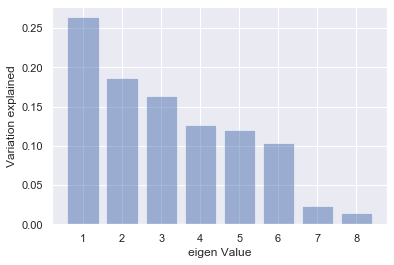

In [355]:
plt.bar(list(range(1,9)),model_pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

###### From the graph it is pretty evident that the first 6 components can explain the data of the dataset clearly. However, we will use the elbow method to actually determine the K value.

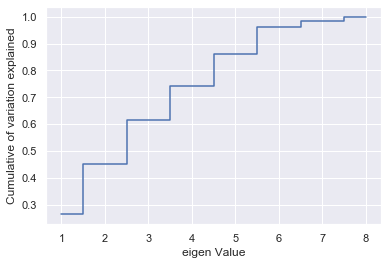

In [356]:
plt.step(list(range(1,9)),np.cumsum(model_pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

###### From the above graphs, we can see that 6 dimensions can clearly explain about 95% of the data.Hence these would be our 8 principal components.

In [358]:
#Since we have found 6 principal components, we will check our PCA with 8 components now instead of 9.
model_pca_new=PCA(n_components=6)
model_pca_new.fit(X_Scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [359]:
#Eigen values
print(model_pca_new.explained_variance_)

[2.11305706 1.49383379 1.3102831  1.01045372 0.95740957 0.8265255 ]


In [360]:
#eigen vectors
print(model_pca_new.components_)

[[-0.07814425 -0.22214689  0.46678807 -0.54606043  0.55562684 -0.00275557
   0.29431731  0.18198813]
 [-0.37724094  0.63346619  0.15816619  0.10026185  0.27641403 -0.42589018
  -0.34408149  0.21251269]
 [ 0.64676616  0.17263018 -0.44737484 -0.21944726  0.25764475 -0.47143471
   0.12161961 -0.01296829]
 [ 0.32898458 -0.34994788  0.17352498  0.28032434 -0.04934353 -0.09725126
  -0.30148245  0.74687932]
 [ 0.23387897  0.18049243 -0.09167463 -0.33729936  0.20612047  0.57936915
  -0.64091903 -0.04020638]
 [ 0.22129237 -0.29364826  0.44157008  0.20137423  0.13769597 -0.32334655
  -0.38144059 -0.6002121 ]]


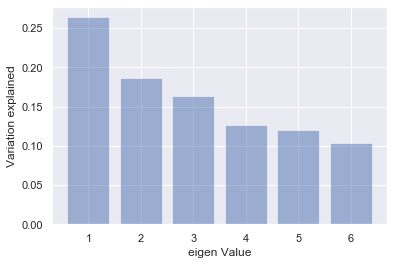

In [361]:
plt.bar(list(range(1,7)),model_pca_new.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

We can see that no data is lost using our principal components only.

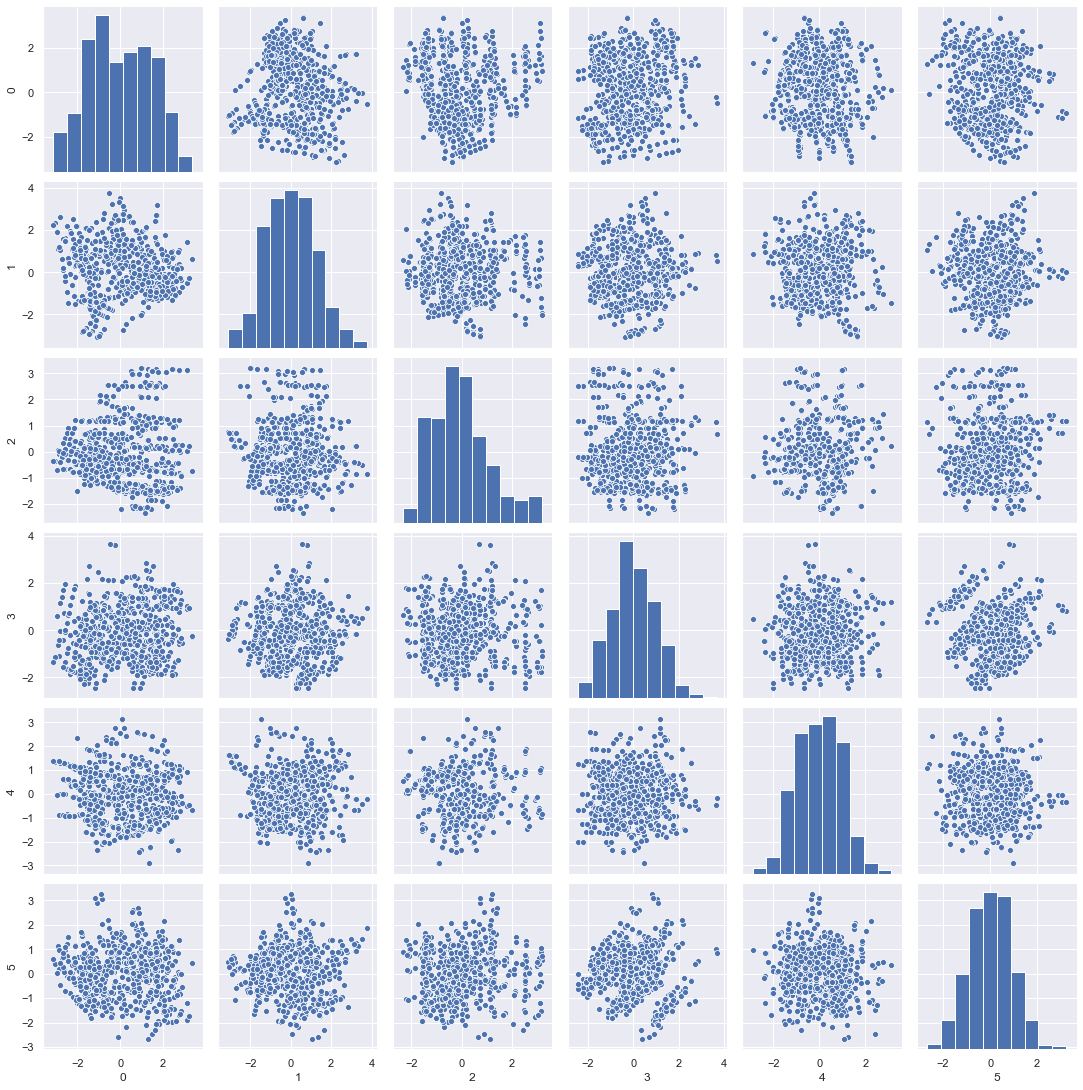

In [362]:
X_pca_transformed = model_pca_new.transform(X_Scaled)
sns.pairplot(pd.DataFrame(X_pca_transformed))

###### We can clearly see from the pairplot that all our 6  principal components are independent of each other, and they explain about 95% of the data.

#### Let us check the performance of the model using random forest with scaled pca data

In [363]:
from sklearn.model_selection import train_test_split
X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_pca_transformed,y, test_size = 0.3, random_state = 10)
y_train_scaled_pca = np.ravel(y_train_scaled_pca)   # to convert 1 d vector into 1 d array

In [364]:
#use the random forest model with best parameters
rf_random.fit(X_train_scaled_pca, y_train_scaled_pca) 

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   16.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [367]:
y_pred_rfr_2 = rf_random.predict(X_test_scaled_pca)

C:\Users\Soumita\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


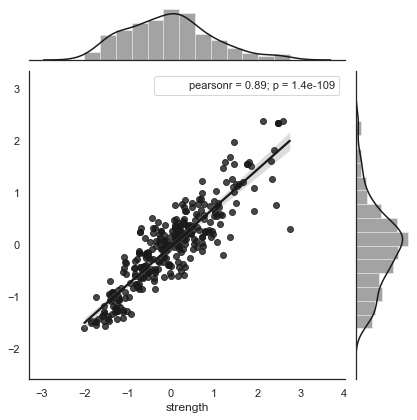

In [368]:
import scipy.stats as stat
sns.set(style="darkgrid", color_codes=True)
       
with sns.axes_style("white"):
    sns.jointplot(x=y_test_scaled_pca, y=y_pred_rfr_2, kind="reg", color="k",stat_func=stat.pearsonr);

### Conclusion

##### We see that using PCA we still get 89% of accuracy which is very good for 95% confidence interval inspite of the fact that 2 attributes have been removed.